In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

## load dataset

In [21]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

def add_label_names(i):
    return iris.target_names[i]
df['label'] = df['target'].apply(add_label_names)

## initial data exploration 

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
df.sample(frac=.1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
4,5.0,3.6,1.4,0.2,0,setosa
101,5.8,2.7,5.1,1.9,2,virginica
121,5.6,2.8,4.9,2.0,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
19,5.1,3.8,1.5,0.3,0,setosa
149,5.9,3.0,5.1,1.8,2,virginica
65,6.7,3.1,4.4,1.4,1,versicolor
70,5.9,3.2,4.8,1.8,1,versicolor
23,5.1,3.3,1.7,0.5,0,setosa
130,7.4,2.8,6.1,1.9,2,virginica


In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## comparing features

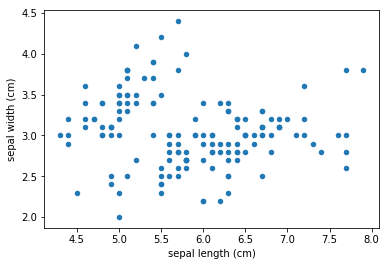

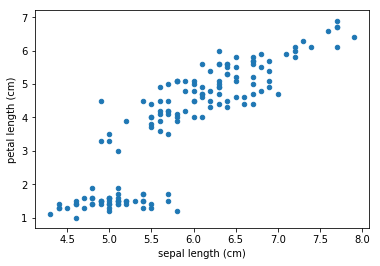

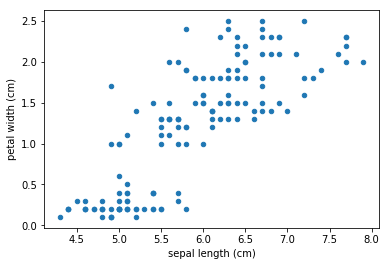

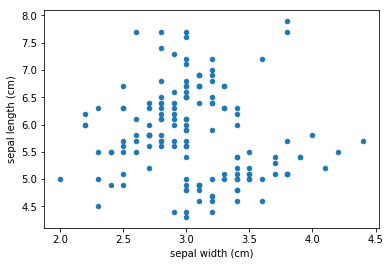

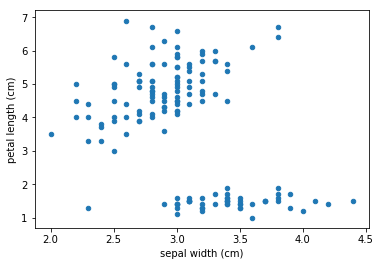

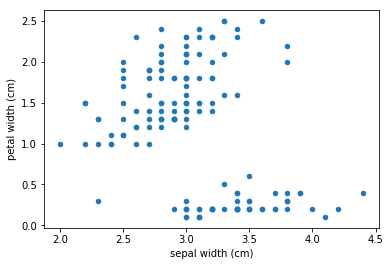

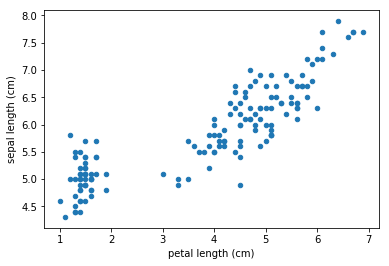

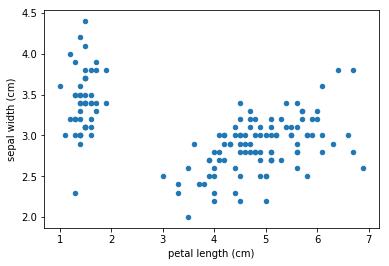

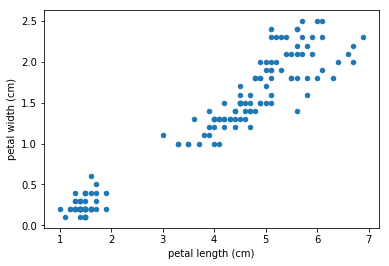

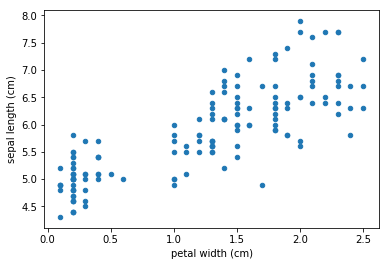

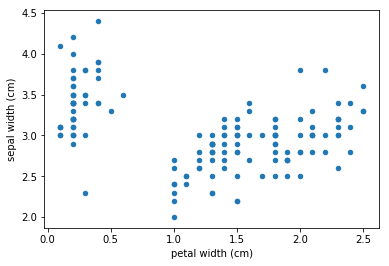

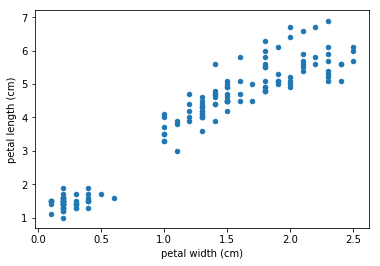

In [53]:
for f in df.columns[:4]:
    for ff in df.columns[:4]:
        if ff != f:
            df.plot.scatter(x=f, y = ff)

## classification

In [30]:
# get features and responses

X = df.iloc[:, :4]
y = df['target']

# make train test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [34]:
# initialize and fit model

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

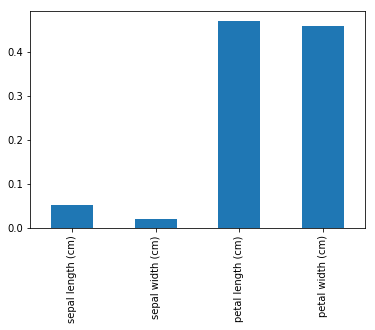

In [47]:
# make series of feature importance and plot

features = pd.Series(rfc.feature_importances_, # weights are the values in the series
                     index=df.columns[:4]) # feature names are the index, show up as labels on the plot


features.plot(kind='bar')

In [48]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'label'],
      dtype='object')

petal features are more important, according to our classifier. so what happens if we plot sepal variables and petal variables?

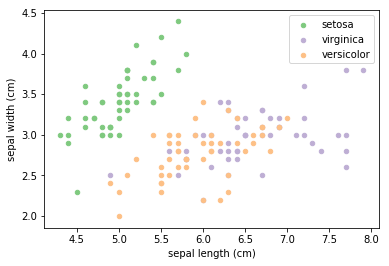

In [69]:
# plot by sepal length/width

ax = df[df['label'] == 'setosa'].plot.scatter(x = 'sepal length (cm)',
                                             y = 'sepal width (cm)',
                                             color = '#7fc97f',
                                             label = 'setosa')

ax = df[df['label'] == 'virginica'].plot.scatter(x = 'sepal length (cm)',
                                             y = 'sepal width (cm)',
                                             color = '#beaed4',
                                             label = 'virginica',
                                             ax = ax)

ax = df[df['label'] == 'versicolor'].plot.scatter(x = 'sepal length (cm)',
                                                 y = 'sepal width (cm)',
                                                 color = "#fdc086",
                                                 label = 'versicolor',
                                                 ax = ax)

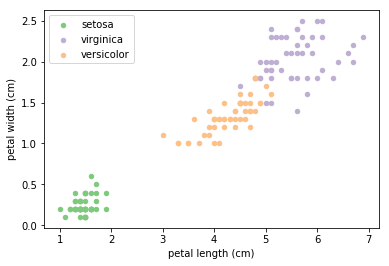

In [70]:
# plot by petal length/width

ax = df[df['label'] == 'setosa'].plot.scatter(x = 'petal length (cm)',
                                             y = 'petal width (cm)',
                                             color = '#7fc97f',
                                             label = 'setosa')

ax = df[df['label'] == 'virginica'].plot.scatter(x = 'petal length (cm)',
                                             y = 'petal width (cm)',
                                             color = '#beaed4',
                                             label = 'virginica',
                                             ax = ax)

ax = df[df['label'] == 'versicolor'].plot.scatter(x = 'petal length (cm)',
                                                 y = 'petal width (cm)',
                                                 color = "#fdc086",
                                                 label = 'versicolor',
                                                 ax = ax)

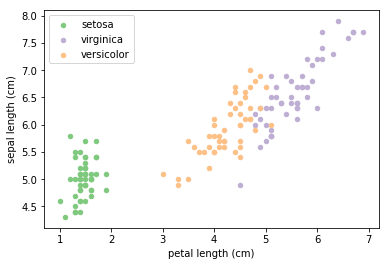

In [71]:
# plot by petal length and sepal length

ax = df[df['label'] == 'setosa'].plot.scatter(x = 'petal length (cm)',
                                             y = 'sepal length (cm)',
                                             color = '#7fc97f',
                                             label = 'setosa')

ax = df[df['label'] == 'virginica'].plot.scatter(x = 'petal length (cm)',
                                             y = 'sepal length (cm)',
                                             color = '#beaed4',
                                             label = 'virginica',
                                             ax = ax)

ax = df[df['label'] == 'versicolor'].plot.scatter(x = 'petal length (cm)',
                                                 y = 'sepal length (cm)',
                                                 color = "#fdc086",
                                                 label = 'versicolor',
                                                 ax = ax)

This again confirms the feature importances determined by the model. The classes are pretty well separated by petal length, but not nearly as much by sepal length.